In [6]:
import numpy as np
import pandas as pd
# Change this path
df = pd.read_csv("C:/Users/Brijmohan/Downloads/air_pollution.csv")



In [7]:


df.head()


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",7/8/2024 11:00,16.515083,80.518167,NH3,2.0,4.0,3.0
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",7/8/2024 11:00,16.515083,80.518167,SO2,21.0,24.0,22.0
2,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",7/8/2024 11:00,14.675886,77.593027,PM10,58.0,92.0,71.0
3,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",7/8/2024 11:00,13.204880,79.097889,NO2,7.0,9.0,9.0
4,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",7/8/2024 11:00,14.465052,78.824187,PM10,NaN,NaN,NaN


In [15]:
sorted(set(df.pollutant_id))
# There are 5 pollutants, therefore dictionary is created for dangerous threshold,
# if lower, it is acceptable, else it is not acceptable
dangerous_thresholds = {
 "NO2": 25,
 "CO": 10,
 "NH3": 80,
 "OZONE": 20,
 "PM10": 30,
 "PM2.5": 65,
 "SO2": 50
}
for index,row in df.iterrows():
 if not np.isnan(row["pollutant_avg"]):
     isAcceptable = "No"
 if row["pollutant_avg"] < dangerous_thresholds[row["pollutant_id"]]:
     isAcceptable = "Yes"
 if np.isnan(row["pollutant_avg"]):
    isAcceptable="nan"
 df.at[index,'isAcceptable'] = isAcceptable
    

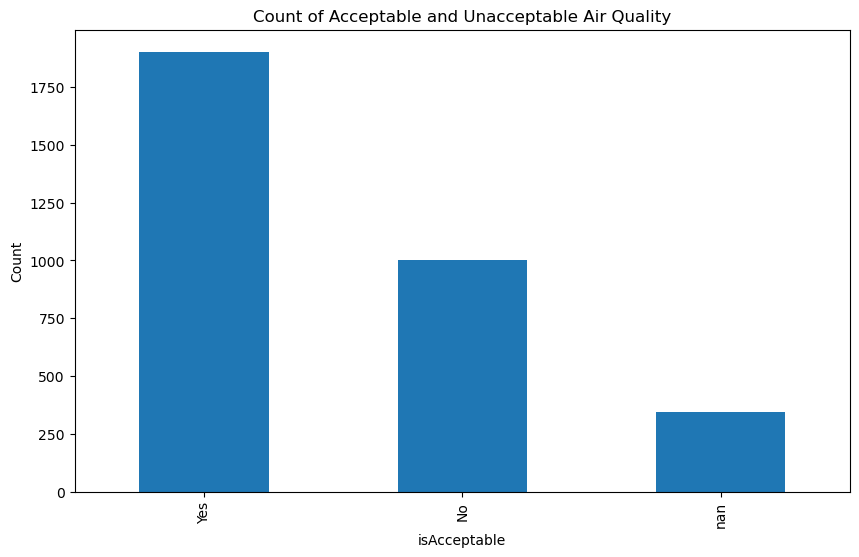

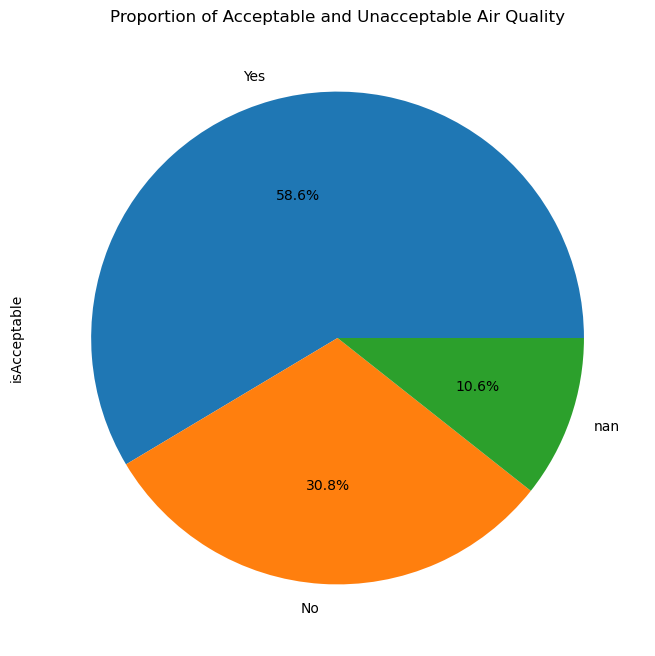

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# Bar chart
plt.figure(figsize=(10, 6))
df['isAcceptable'].value_counts().plot(kind='bar')
plt.title('Count of Acceptable and Unacceptable Air Quality')
plt.xlabel('isAcceptable')
plt.ylabel('Count')
plt.show()
# Pie chart
plt.figure(figsize=(8, 8))
df['isAcceptable'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Acceptable and Unacceptable Air Quality')
plt.show()

In [16]:
# Removing all nan values
df_without_nan = df.dropna(subset=["pollutant_avg"])
print("df size:" + str(df.shape[0]))
print("df without nan size:" + str(df_without_nan.shape[0]))

df size:3249
df without nan size:2903


In [17]:
# unique times
print(sorted(set(df.last_update)))
# since only one type of date exist, we will remove this column
df_without_nan.drop(inplace=True, columns=["last_update"])

['7/8/2024 11:00']


C:\Users\Brijmohan\AppData\Local\Temp\ipykernel_15656\800833279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_nan.drop(inplace=True, columns=["last_update"])


In [18]:
# One Hot Encoding pollutant_id
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder
encoder = OneHotEncoder()
# Fit and transform the 'pollutant_id' column
encoded_pollutant_id = encoder.fit_transform(df_without_nan[['pollutant_id']])
print(encoded_pollutant_id.shape[0])
print(df_without_nan.shape[0])
# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_pollutant_id.toarray(),
 columns=encoder.get_feature_names_out(['pollutant_id']))
# Concatenate the encoded features with the original DataFrame
df_without_nan.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([df_without_nan, encoded_df], axis=1)
df_encoded.drop(columns=["pollutant_id"], inplace=True)
df_encoded.head()


2903
2903


,country,state,city,station,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg,isAcceptable,pollutant_id_CO,pollutant_id_NH3,pollutant_id_NO2,pollutant_id_OZONE,pollutant_id_PM10,pollutant_id_PM2.5,pollutant_id_SO2
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",16.515083,80.518167,2.0,4.0,3.0,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",16.515083,80.518167,21.0,24.0,22.0,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",14.675886,77.593027,58.0,92.0,71.0,No,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",13.204880,79.097889,7.0,9.0,9.0,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",16.987287,81.736318,11.0,12.0,12.0,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0


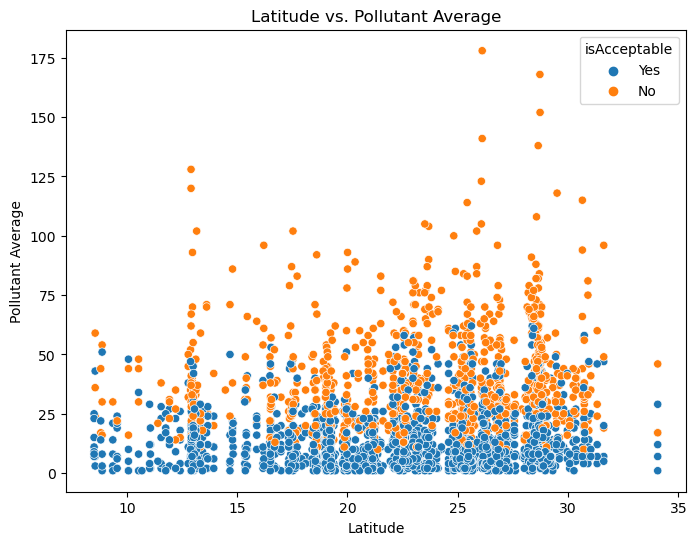

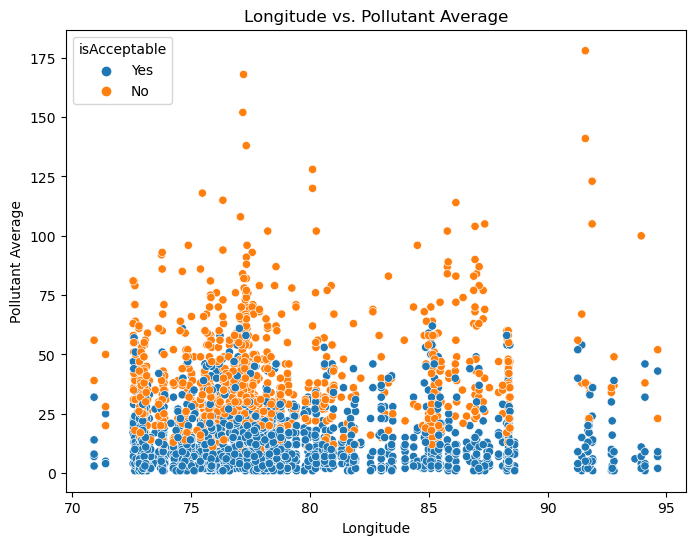

In [19]:
 import seaborn as sns
# Scatter plot for latitude vs. pollutant_avg
plt.figure(figsize=(8, 6))
sns.scatterplot(x='latitude', y='pollutant_avg', hue='isAcceptable', data=df_encoded)
plt.title('Latitude vs. Pollutant Average')
plt.xlabel('Latitude')
plt.ylabel('Pollutant Average')
plt.show()
# Scatter plot for longitude vs. pollutant_avg
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='pollutant_avg', hue='isAcceptable', data=df_encoded)
plt.title('Longitude vs. Pollutant Average')
plt.xlabel('Longitude')
plt.ylabel('Pollutant Average')
plt.show()

In [24]:
# Model fitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
not_needed_columns = ["country","state","city","station", "isAcceptable"]
# X = df_without_nan[['pollutant_avg', 'latitude', 'longitude', 'pollutant_id']]
X = df_encoded.drop(columns=not_needed_columns)
# y = df_encoded['isAcceptable']
# Fit and transform the 'isAcceptable' column
y = label_encoder.fit_transform(df_encoded["isAcceptable"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(sorted(set(df_encoded["isAcceptable"])))
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

['No', 'Yes']


KNeighborsClassifier()

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
print(best_k)

18


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_curve(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       190
           1       0.86      0.87      0.86       391

    accuracy                           0.82       581
   macro avg       0.79      0.79      0.79       581
weighted avg       0.81      0.82      0.82       581

[[134  56]
 [ 51 340]]
0.8158347676419966
0.8640406607369759


NameError: name 'roc_curve' is not defined

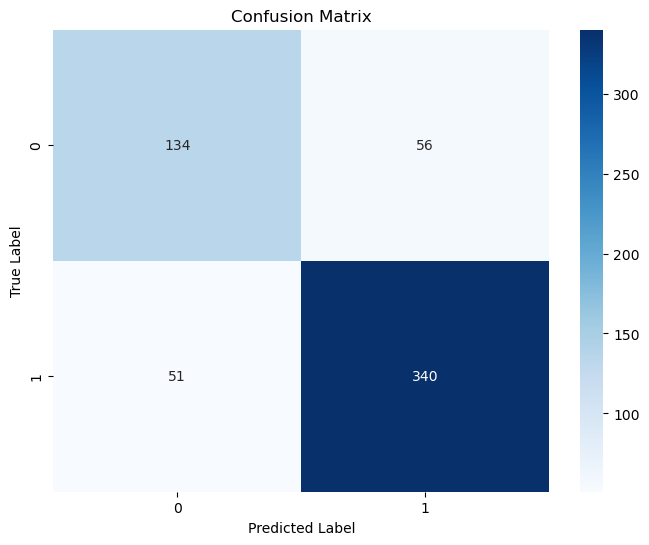

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()